# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 

Running this project require the following imports 

In [47]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
#from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN

from sklearn import mixture
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import silhouette_score
import matplotlib.colors as mcolors
from scipy.spatial.distance import cdist

%matplotlib inline

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    plt.figure(figsize=(8,4))
    ax = plt.axes()
    ax.set_facecolor("grey")
    color = list(mcolors.CSS4_COLORS)[::-2] #List colors
    
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(-1,num_clusters):
            if i == -1:
                plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = 'black',alpha = 0.05,s=s)
            else:
                plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            #plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
    plt.show()

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



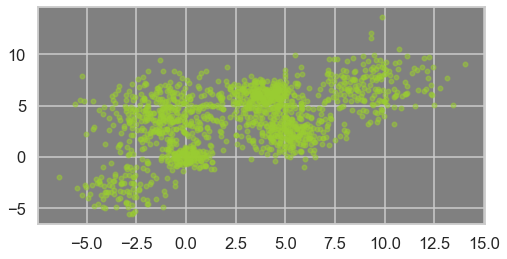

In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

In [5]:
#A dictionary to store silhouette_score of different models
multi_blob_silhouette = {}

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [6]:
def kmeans_without_plotting(data):
    distortions = []
    silhouette_scores = []
    highest_score = -1
    optimal_cluster = 0
    
    for k in range(2,100,1):
        kmeans = KMeans(n_clusters=k).fit(data)
        distortions.append(sum(np.min(cdist(data, kmeans.cluster_centers_,
                                            'euclidean'), axis=1)) / data.shape[0])
        
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)
        if score > highest_score:
            highest_score = score
            optimal_cluster = k
                
    
    print(f'the optimal number of cluster is : {optimal_cluster}')
    plt.figure(figsize=(8,4))
    plt.plot(range(2,100,1), distortions)
    plt.xlabel('Values of K')
    plt.ylabel('Distortions')
    plt.title('The Elbow Method using distortions')
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.plot(range(2,100,1), silhouette_scores )
    plt.xlabel('Values of K')
    plt.ylabel('score')
    plt.title('Silhouette Score of different number of clusters')
    plt.show()
    
    
    return highest_score, optimal_cluster

In [7]:
def kmeans(data):
    distortions = []
    silhouette_scores = []
    highest_score = -1
    optimal_cluster = 0
    
    for k in range(2,20,1):
        kmeans = KMeans(n_clusters=k).fit(data)
        print(f'Number of cluster is : {k}')
        display_cluster(data, km= kmeans, num_clusters = k )
        distortions.append(sum(np.min(cdist(data, kmeans.cluster_centers_,
                                            'euclidean'), axis=1)) / data.shape[0])
        
        score = silhouette_score(data, kmeans.labels_, metric='euclidean')
        if score > highest_score:
            highest_score = score
            optimal_cluster = k
        silhouette_scores.append(score)
        
    
    print(f'the optimal number of cluster is : {optimal_cluster}')
    plt.figure(figsize=(8,4))
    plt.plot(range(2,20,1), distortions, 'bx-')
    plt.xticks(range(2,20,1))
    plt.xlabel('Values of K')
    plt.ylabel('Distortions')
    plt.title('The Elbow Method using distortions')
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.plot(range(2,20,1), silhouette_scores, 'bx-')
    plt.xticks(range(2,20,1))
    plt.xlabel('Values of K')
    plt.ylabel('score')
    plt.title('Silhouette Score of different number of clusters')
    plt.show()
    
    
    return max(silhouette_scores), optimal_cluster

    

Number of cluster is : 2


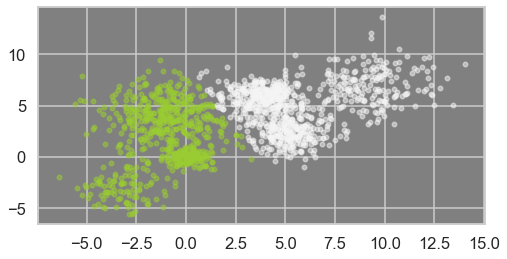

Number of cluster is : 3


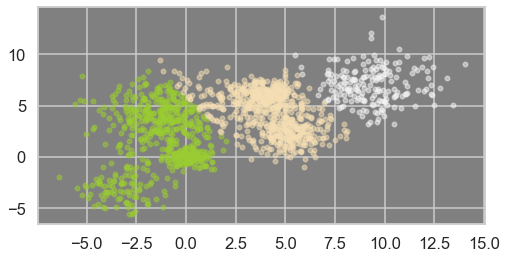

Number of cluster is : 4


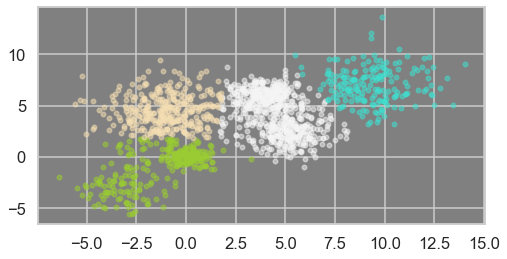

Number of cluster is : 5


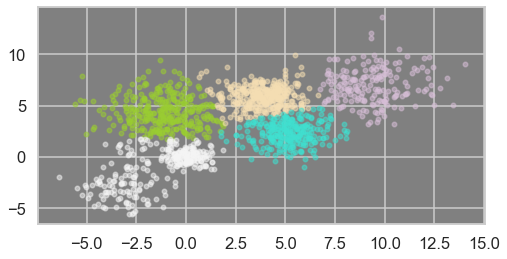

Number of cluster is : 6


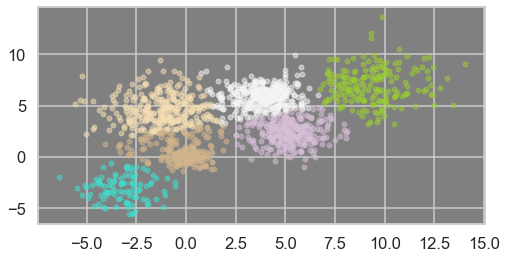

Number of cluster is : 7


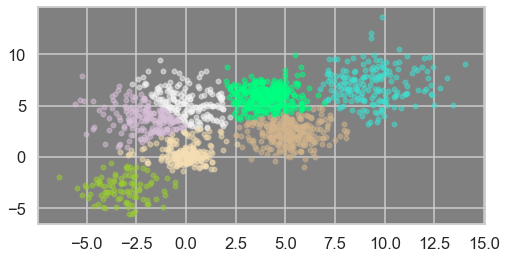

Number of cluster is : 8


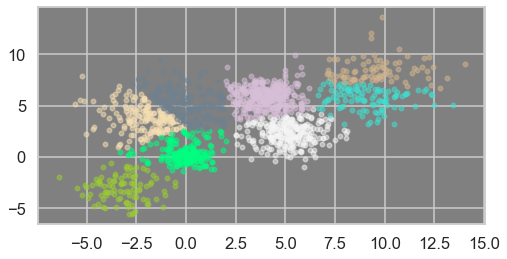

Number of cluster is : 9


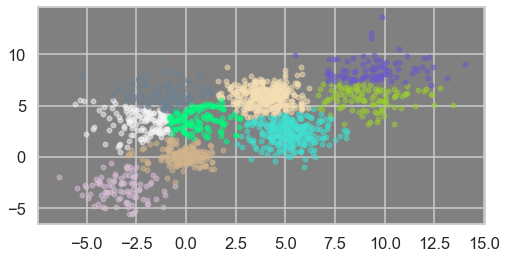

Number of cluster is : 10


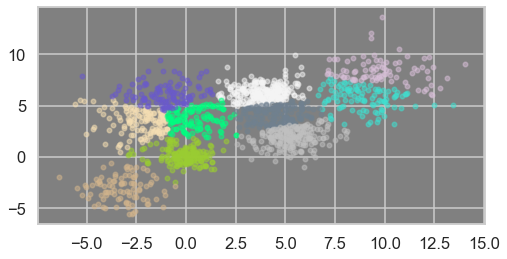

Number of cluster is : 11


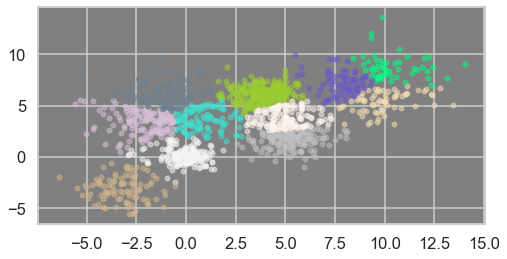

Number of cluster is : 12


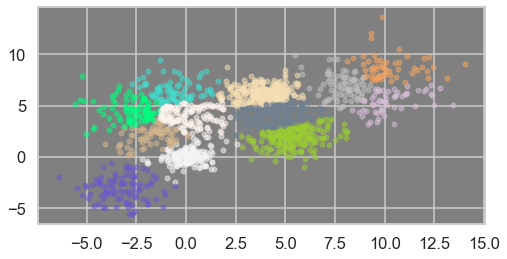

Number of cluster is : 13


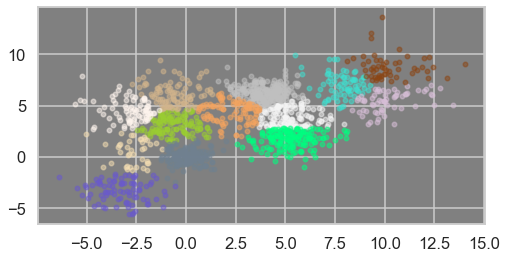

Number of cluster is : 14


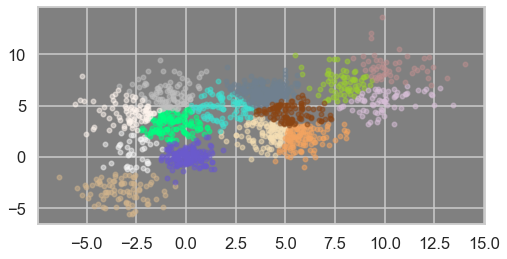

Number of cluster is : 15


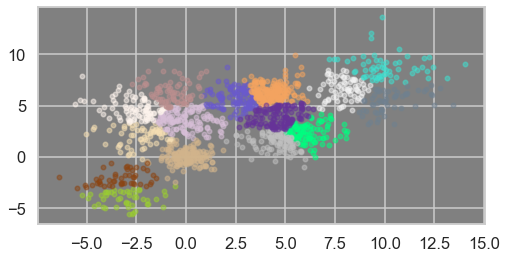

Number of cluster is : 16


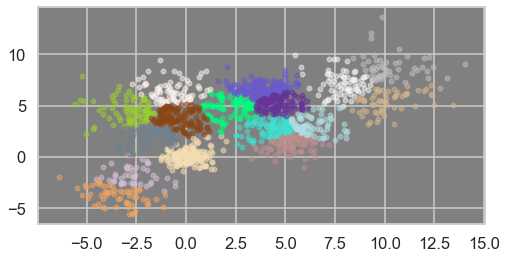

Number of cluster is : 17


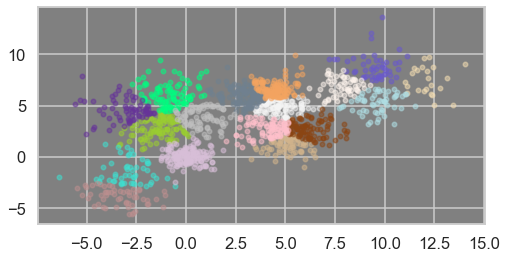

Number of cluster is : 18


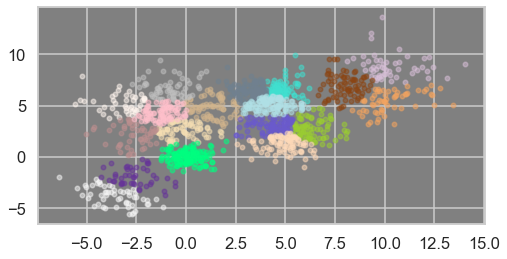

Number of cluster is : 19


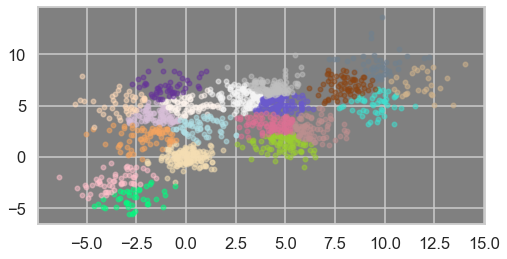

the optimal number of cluster is : 6


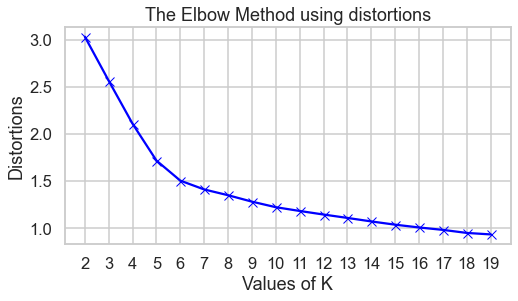

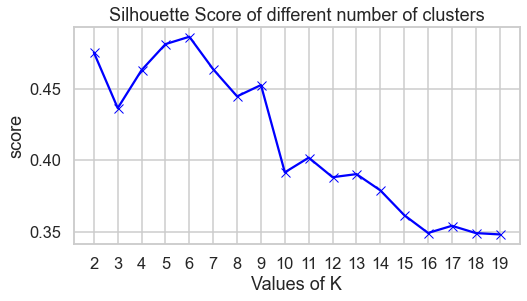

In [8]:
result = kmeans(Multi_blob_Data)

In [9]:
multi_blob_silhouette['kmeans'] = {'score':result[0],'no_clusters':result[1]}

In [10]:
multi_blob_silhouette

{'kmeans': {'score': 0.48614459735646176, 'no_clusters': 6}}

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [11]:
def draw_dendrogram(data, method, metric):
    plt.figure(figsize=(80,8))
    dendrogram(linkage(data, method=method, metric=metric))
    plt.show()

In [12]:
# Agglomerative Clustering function using single link 
def single_link_agglomerative_clustering( data, affinity, distance_threshold, draw = True):
    
    model = AgglomerativeClustering( linkage= 'single', affinity= affinity, distance_threshold = distance_threshold,n_clusters=None ).fit(data)
    n_clusters = len( set(model.labels_) )
    print(f'Number of clusters using single linkage and affinity {affinity} and distance threshold {distance_threshold} :', n_clusters)
    if draw:
        display_cluster(data, model, n_clusters)


In [13]:
# Agglomerative Clustering function using single link 
def average_link_agglomerative_clustering( data, affinity, distance_threshold, draw = True):
    
    model = AgglomerativeClustering( linkage= 'average', affinity= affinity, distance_threshold = distance_threshold,n_clusters=None ).fit(data)
    n_clusters = len( set(model.labels_) )
    print(f'Number of clusters using average linkage and affinity {affinity} and distance threshold {distance_threshold} :', n_clusters)
    if draw:
        display_cluster(data, model, n_clusters)
            

In [14]:
affinity = ['euclidean','cityblock','cosine']

Dendrogram using single linkage and affinity euclidean


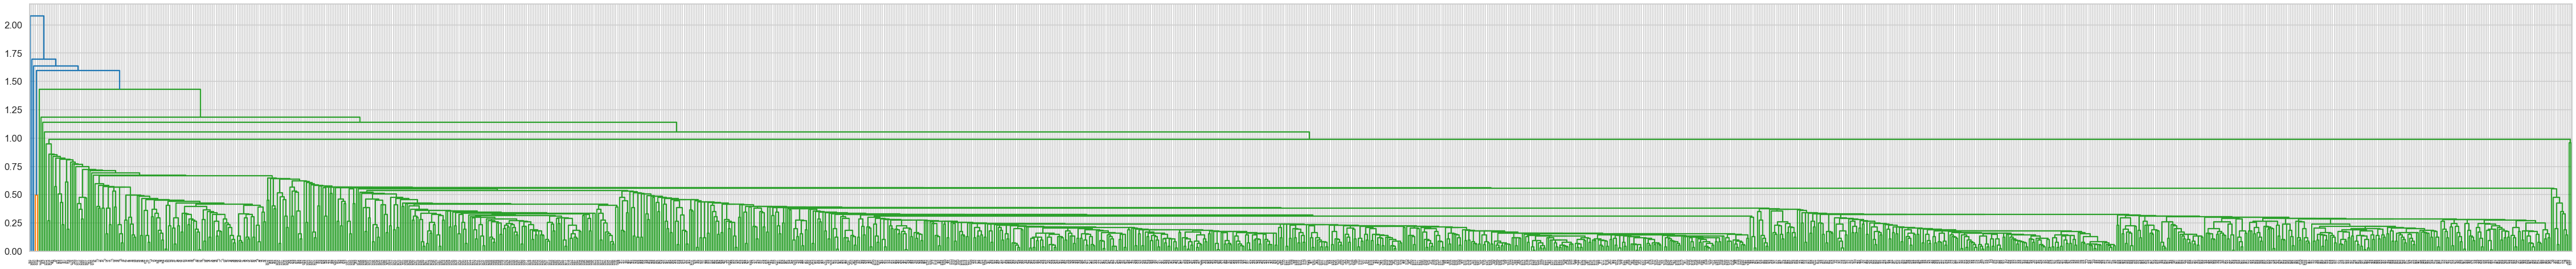

Dendrogram using single linkage and affinity cityblock


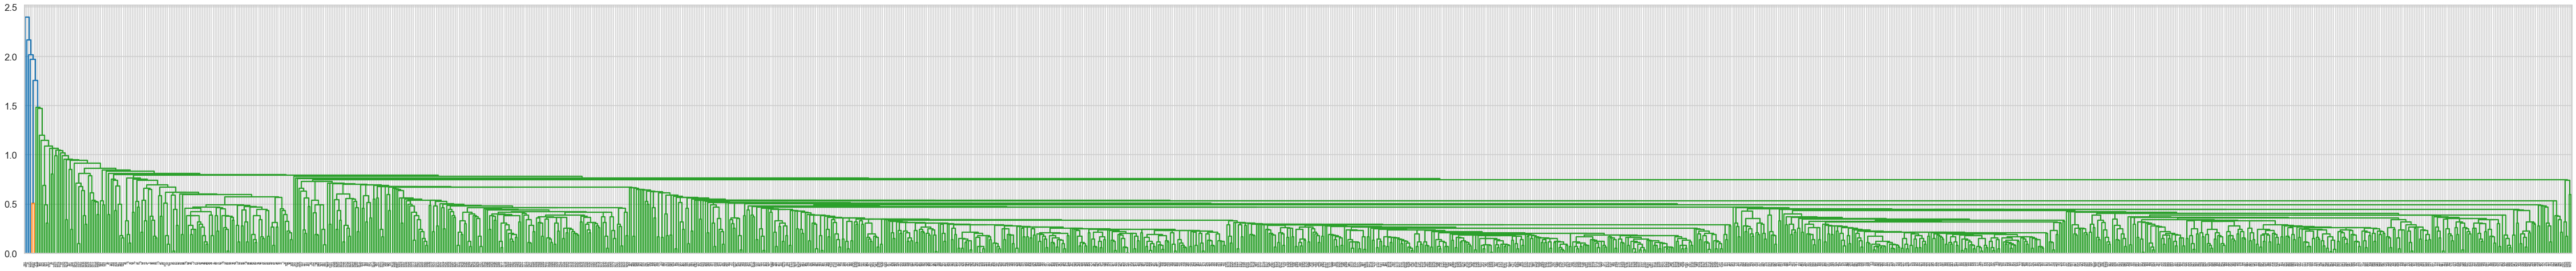

Dendrogram using single linkage and affinity cosine


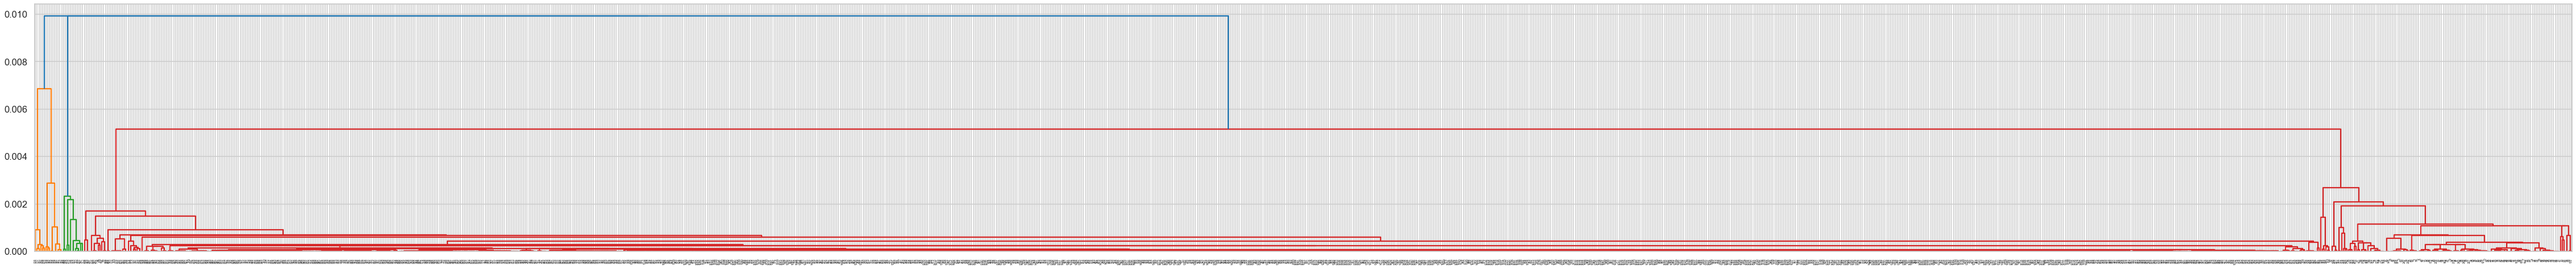

In [15]:
#draw dendrogram using single linkage with different affinity
for aff in affinity:
    print(f'Dendrogram using single linkage and affinity {aff}')
    draw_dendrogram(Multi_blob_Data, 'single', aff)

Dendrogram using average linkage and affinity euclidean


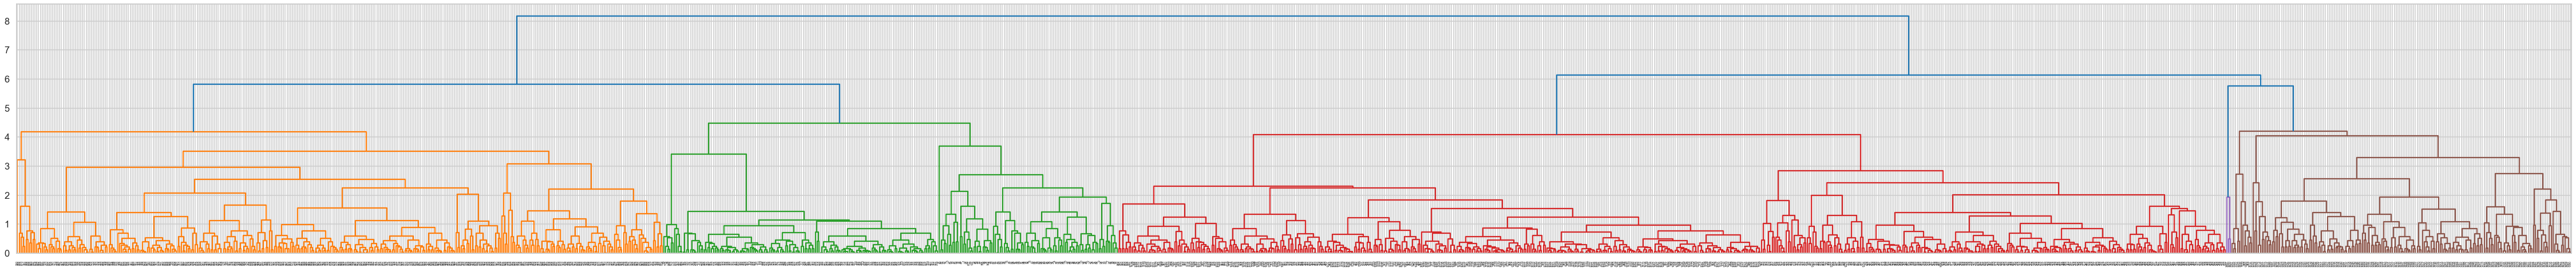

Dendrogram using average linkage and affinity cityblock


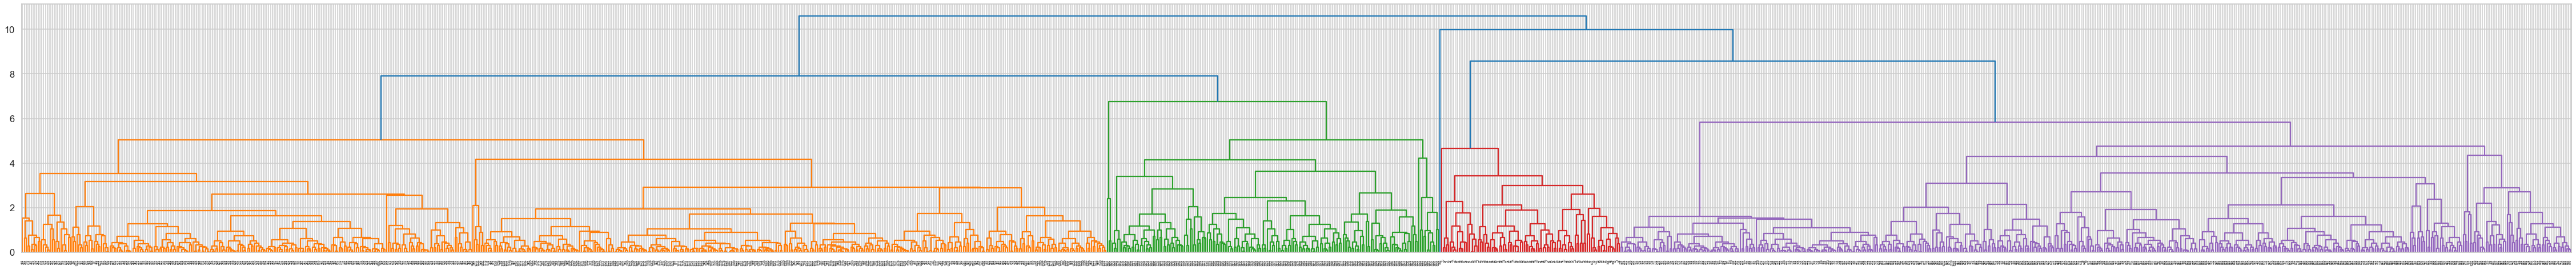

Dendrogram using average linkage and affinity cosine


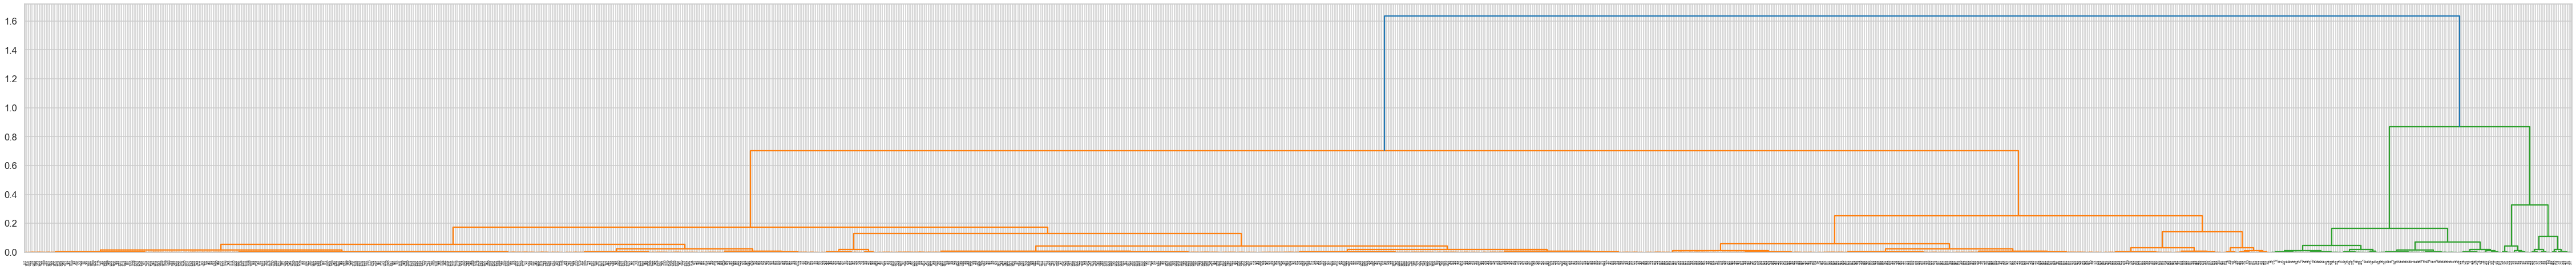

In [16]:
#draw dendrogram using single linkage with different affinity
for aff in affinity:
    print(f'Dendrogram using average linkage and affinity {aff}')
    draw_dendrogram(Multi_blob_Data, 'average', aff )

Number of clusters using single linkage and affinity euclidean and distance threshold 1.5 : 5


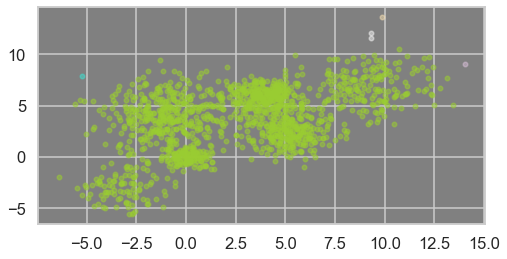

Number of clusters using single linkage and affinity euclidean and distance threshold 1.25 : 6


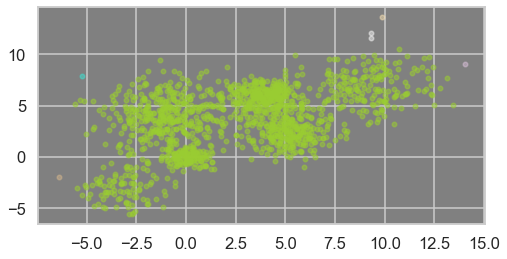

Number of clusters using single linkage and affinity cityblock and distance threshold 2 : 4


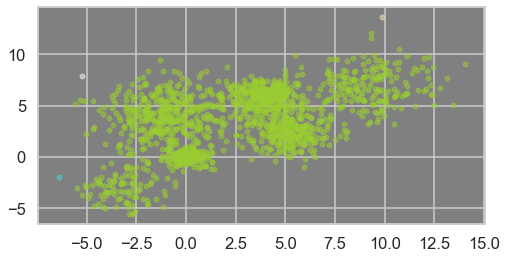

Number of clusters using single linkage and affinity cityblock and distance threshold 1.5 : 6


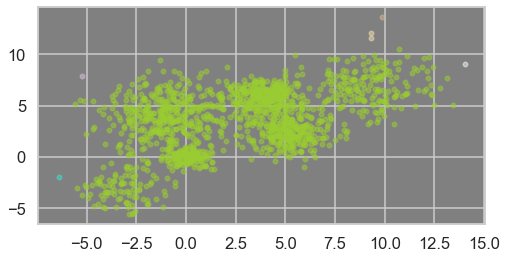

Number of clusters using single linkage and affinity cosine and distance threshold 0.004 : 5


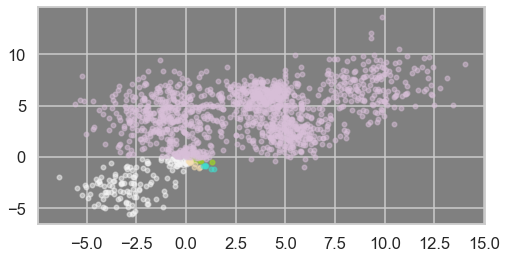

Number of clusters using single linkage and affinity cosine and distance threshold 0.008 : 3


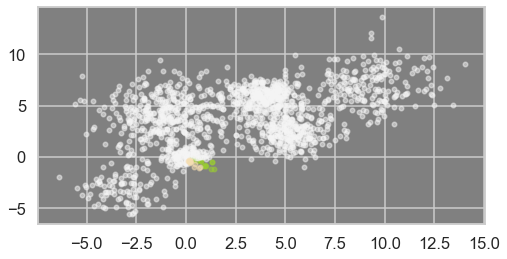

In [17]:
#usinge different threshold with single linkage and euclidean 
for distance_threshold in [1.5,1.25] :
    single_link_agglomerative_clustering( Multi_blob_Data, 'euclidean', distance_threshold)

print('================')
#usinge different threshold with average linkage and Manhattan 
for distance_threshold in [2,1.5] :
    single_link_agglomerative_clustering( Multi_blob_Data, 'cityblock', distance_threshold)
print('=================')
#usinge different threshold with average linkage and cosine 
for distance_threshold in [0.004,0.008] :
    single_link_agglomerative_clustering( Multi_blob_Data, 'cosine', distance_threshold)
print('=================')

Number of clusters using average linkage and affinity euclidean and distance threshold 4 : 10


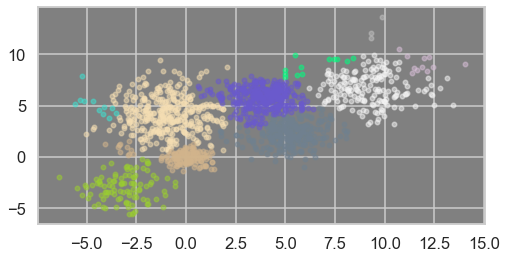

Number of clusters using average linkage and affinity euclidean and distance threshold 5 : 5


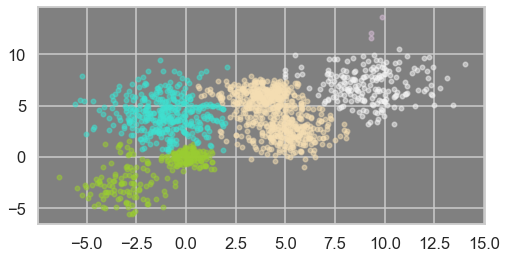

Number of clusters using average linkage and affinity cityblock and distance threshold 4 : 16


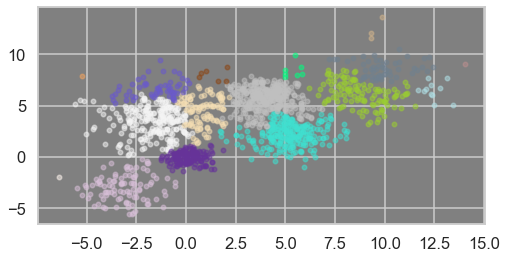

Number of clusters using average linkage and affinity cityblock and distance threshold 5 : 9


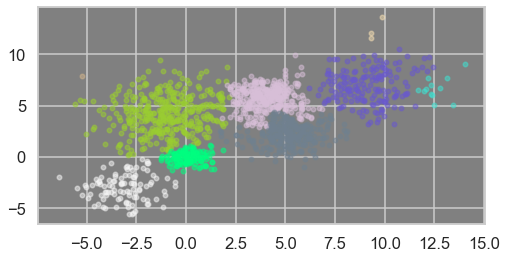

Number of clusters using average linkage and affinity cosine and distance threshold 0.2 : 6


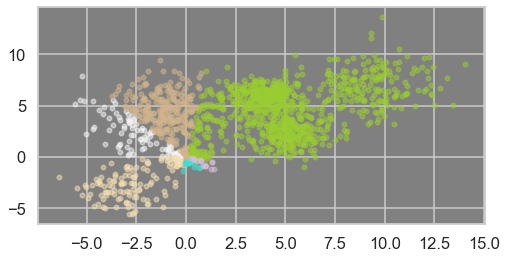

Number of clusters using average linkage and affinity cosine and distance threshold 0.8 : 3


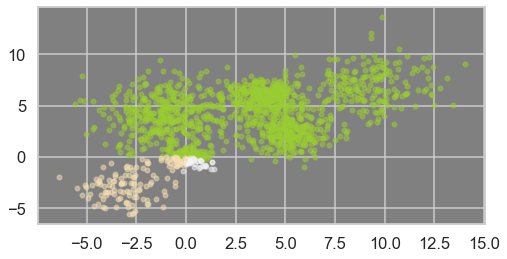

In [18]:
#usinge different threshold with average linkage and euclidean 
for distance_threshold in [4,5] :
    average_link_agglomerative_clustering( Multi_blob_Data, 'euclidean', distance_threshold)

print('===================')
#usinge different threshold with average linkage and Manhattan 
for distance_threshold in [4,5] :
    average_link_agglomerative_clustering( Multi_blob_Data, 'cityblock', distance_threshold)
print('===================')
#usinge different threshold with average linkage and cosine 
for distance_threshold in [0.2,0.8] :
    average_link_agglomerative_clustering( Multi_blob_Data, 'cosine', distance_threshold)
print('===================')

In [19]:
def silhouette_agglomerative(data, linkage, affinity):
    high_score = -2
    for k in range(2,100,1):
        model = AgglomerativeClustering(n_clusters=k, linkage= linkage, affinity= affinity).fit(data)
        score = silhouette_score(data, model.labels_)

        if score > high_score:
        
            high_score = score
            n_clusters = k
            
    return high_score, n_clusters

In [20]:
combination = [-2,None,None]
for linkage in ['single','average']:
    for aff in ['euclidean','cityblock','cosine']:
        result = silhouette_agglomerative(Multi_blob_Data, linkage, aff)

        if  result[0] > combination[0]:
            combination[0] = result[0]
            combination[1] = { 'linkage' : linkage, 'affinity' : aff}
            combination[2] = result[1]
print( f'Silhouette score {combination[0]}, {combination[1]}, and the number of cluster for the best value {combination[2]}')

Silhouette score 0.4716908069861964, {'linkage': 'average', 'affinity': 'euclidean'}, and the number of cluster for the best value 2


In [21]:
multi_blob_silhouette['Agglomerative']  = { 'score':combination[0],'best combination':combination[1], 'no_clusters':combination[2]}
multi_blob_silhouette

{'kmeans': {'score': 0.48614459735646176, 'no_clusters': 6},
 'Agglomerative': {'score': 0.4716908069861964,
  'best combination': {'linkage': 'average', 'affinity': 'euclidean'},
  'no_clusters': 2}}

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [22]:
#number of cluster == 0 means that all the points are considered noise
def dbscan(data, eps, min_samples):
    model = DBSCAN(eps = eps, min_samples = min_samples).fit(Multi_blob_Data)
    n_clusters = len(set(model.labels_)) - 1 if -1 in model.labels_ else len(set(model.labels_))
    print(f'using eps {eps}, and min_samples {min_samples} the number of clusters is : {n_clusters }' )
    display_cluster(data, model, n_clusters)

using eps 0.1, and min_samples 5 the number of clusters is : 11


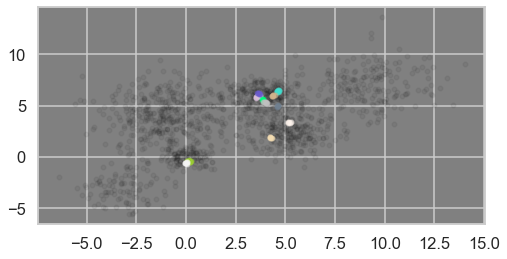

using eps 0.1, and min_samples 10 the number of clusters is : 0


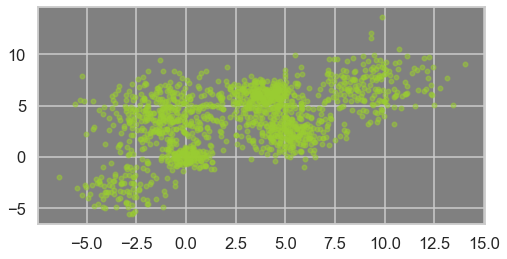

using eps 0.1, and min_samples 15 the number of clusters is : 0


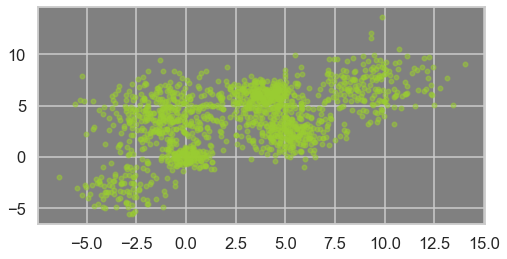

using eps 0.1, and min_samples 20 the number of clusters is : 0


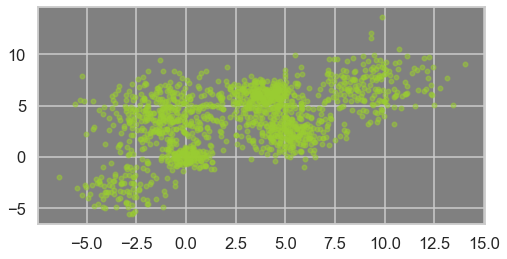

using eps 0.1, and min_samples 25 the number of clusters is : 0


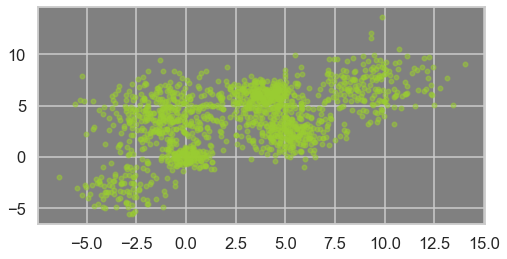

using eps 0.825, and min_samples 5 the number of clusters is : 1


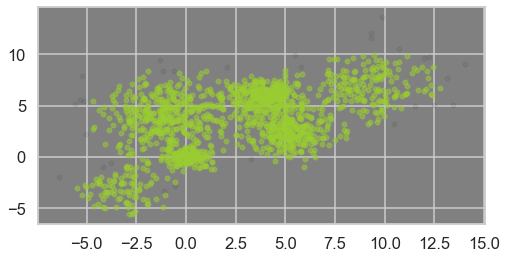

using eps 0.825, and min_samples 10 the number of clusters is : 3


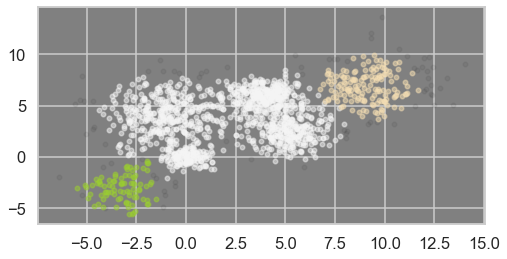

using eps 0.825, and min_samples 15 the number of clusters is : 3


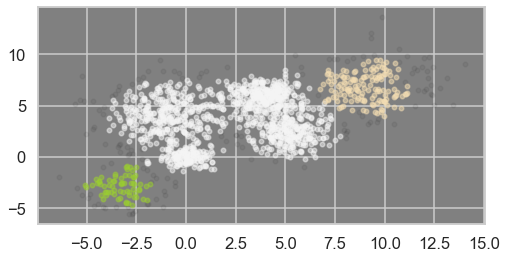

using eps 0.825, and min_samples 20 the number of clusters is : 3


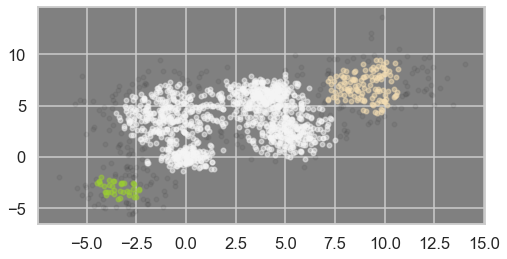

using eps 0.825, and min_samples 25 the number of clusters is : 4


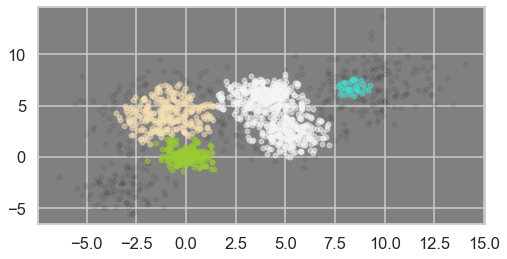

using eps 1.55, and min_samples 5 the number of clusters is : 1


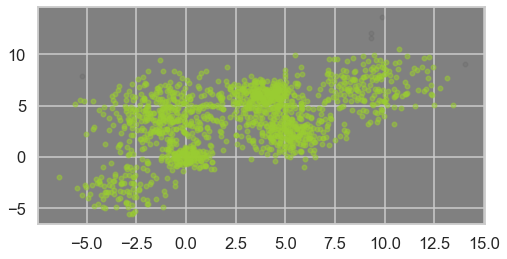

using eps 1.55, and min_samples 10 the number of clusters is : 1


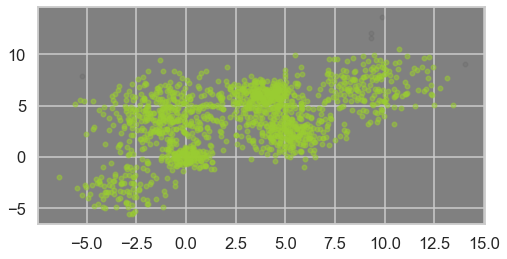

using eps 1.55, and min_samples 15 the number of clusters is : 1


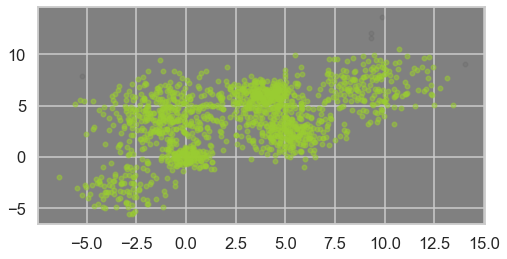

using eps 1.55, and min_samples 20 the number of clusters is : 1


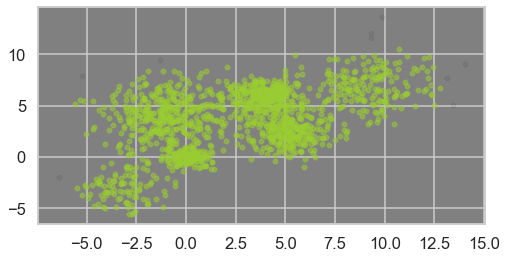

using eps 1.55, and min_samples 25 the number of clusters is : 1


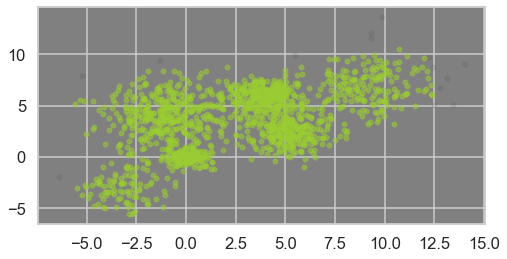

using eps 2.275, and min_samples 5 the number of clusters is : 1


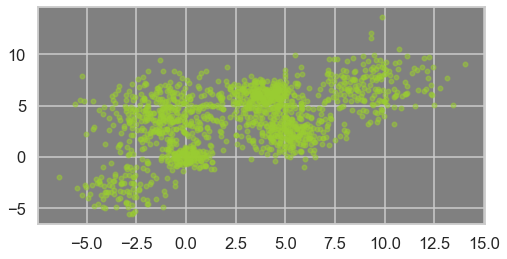

using eps 2.275, and min_samples 10 the number of clusters is : 1


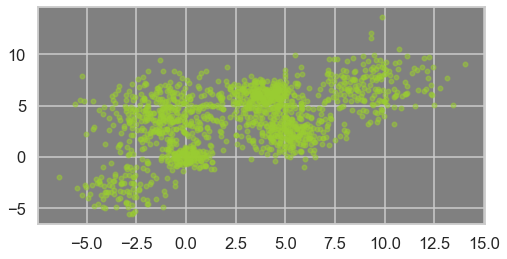

using eps 2.275, and min_samples 15 the number of clusters is : 1


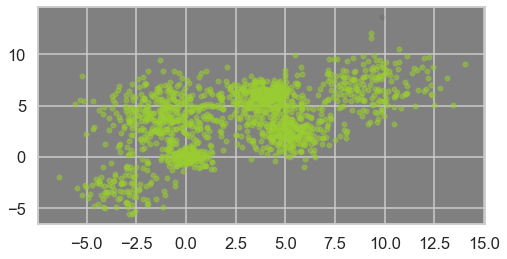

using eps 2.275, and min_samples 20 the number of clusters is : 1


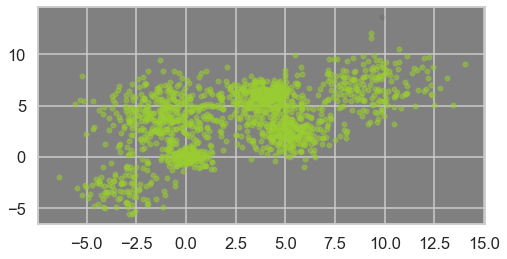

using eps 2.275, and min_samples 25 the number of clusters is : 1


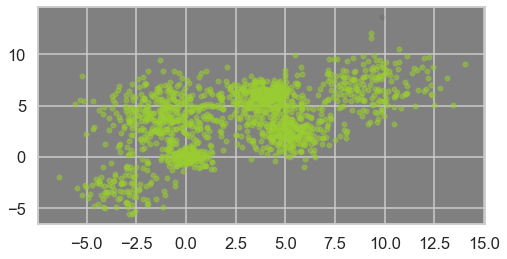

using eps 3.0, and min_samples 5 the number of clusters is : 1


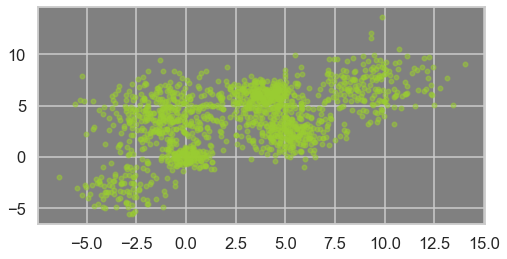

using eps 3.0, and min_samples 10 the number of clusters is : 1


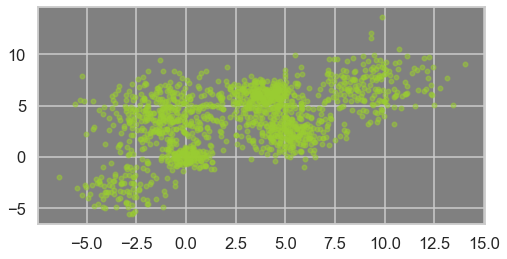

using eps 3.0, and min_samples 15 the number of clusters is : 1


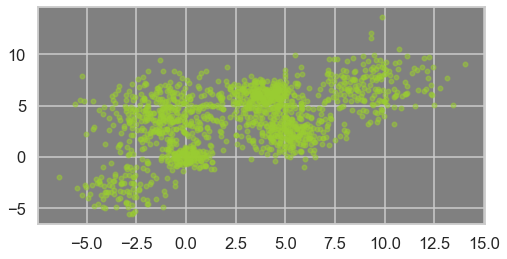

using eps 3.0, and min_samples 20 the number of clusters is : 1


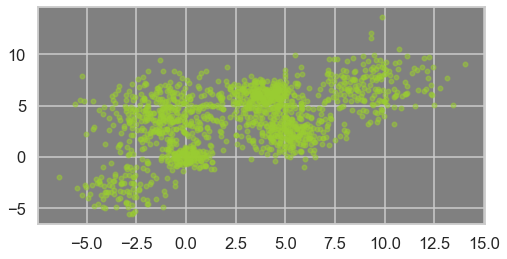

using eps 3.0, and min_samples 25 the number of clusters is : 1


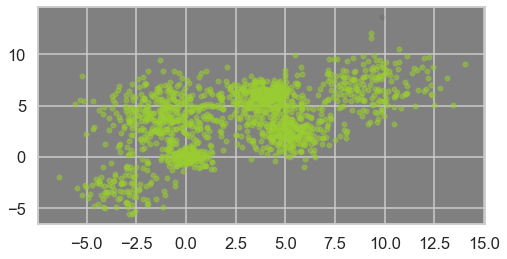

In [23]:
for eps in np.linspace(0.1,3,5):
    for min_samples in range(5,26,5):
        dbscan(Multi_blob_Data,eps,min_samples)
        

In [24]:
def dbscan_best_combination(data, draw = True):
    high_score = -1
    best_combination = []
    number_clusers = 0
    for min_samples in range(5,26,1):
        silhouette_scores = []
        x_ticks = []
        valid = True
        for eps in np.linspace(0.1,3,30):
            model = DBSCAN(eps=eps,min_samples=min_samples).fit(data)

            if len(set(model.labels_)) > 1:
                score = silhouette_score(data, model.labels_ )
                silhouette_scores.append(score)
                x_ticks.append(eps)
        
                
                if score > high_score:
                    best_combination = {'eps' : eps, 'min_samples' : min_samples }
                    high_score = score
                    number_clusers = len(set(model.labels_))
                    number_clusers = number_clusers - 1 if -1 in set(model.labels_) else number_clusers 

        if draw:
            print(f'using min_samples {min_samples} the silhouette is : {score}' )
            plt.figure(figsize=(8,4))
            plt.plot(x_ticks, silhouette_scores, 'bx-')
            plt.xlabel('eps')
            plt.ylabel('score')
            plt.title(f'Silhouette Score of different number of eps and min sample {min_samples}')
            plt.show()
            print('===========================')
    
    return [high_score, best_combination , number_clusers  ]

using min_samples 5 the silhouette is : 0.4479741534934026


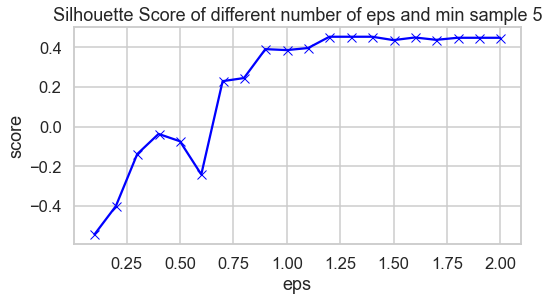

using min_samples 6 the silhouette is : 0.4685207355522043


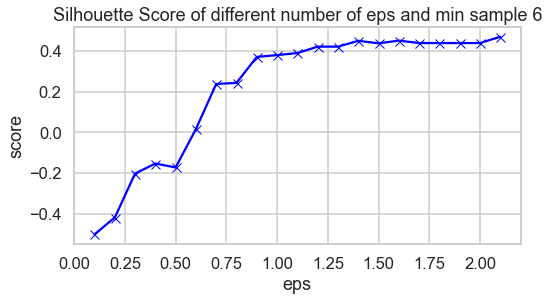

using min_samples 7 the silhouette is : 0.4685207355522043


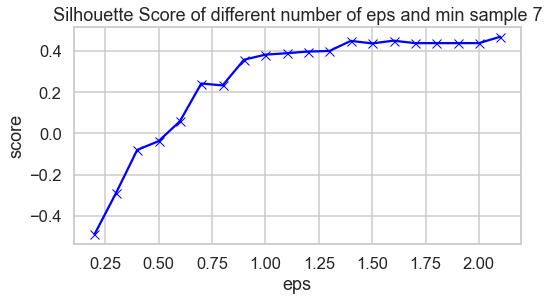

using min_samples 8 the silhouette is : 0.4685207355522043


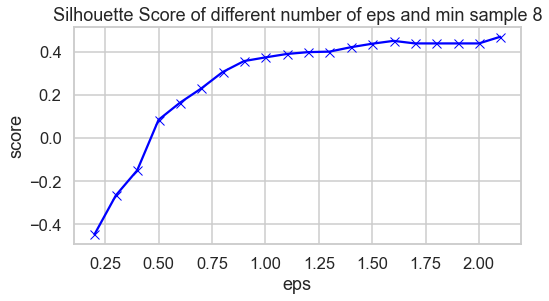

using min_samples 9 the silhouette is : 0.4685207355522043


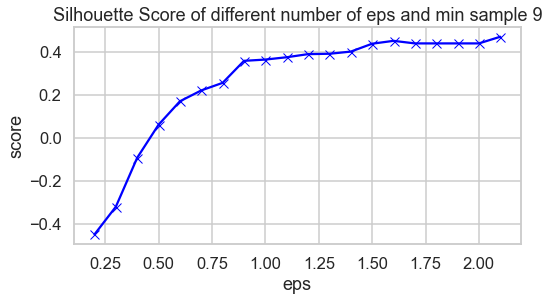

using min_samples 10 the silhouette is : 0.4685207355522043


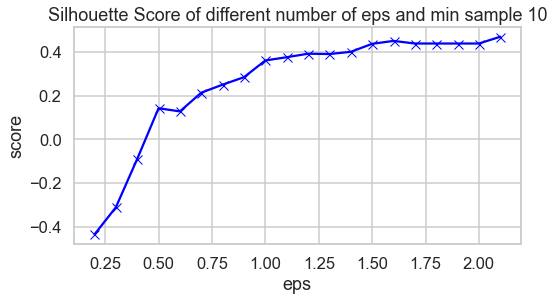

using min_samples 11 the silhouette is : 0.4685207355522043


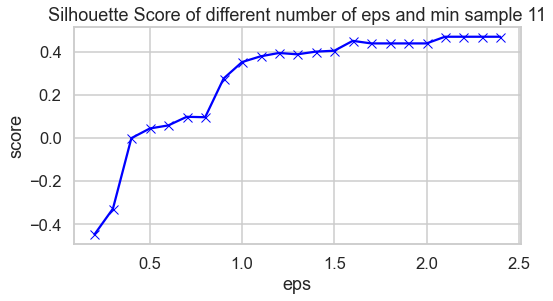

using min_samples 12 the silhouette is : 0.4685207355522043


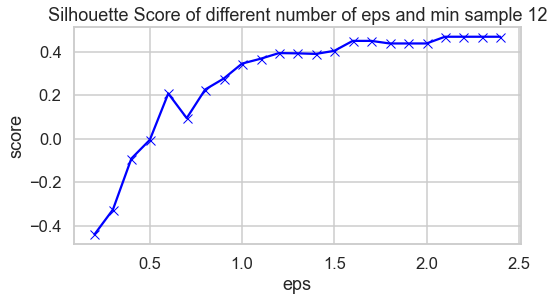

using min_samples 13 the silhouette is : 0.4685207355522043


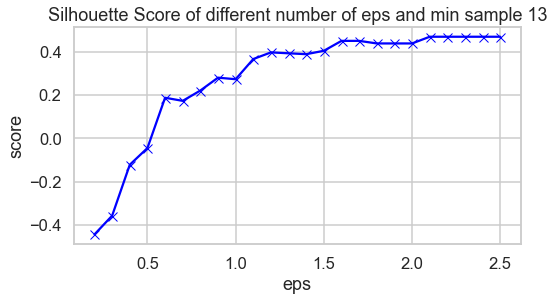

using min_samples 14 the silhouette is : 0.4685207355522043


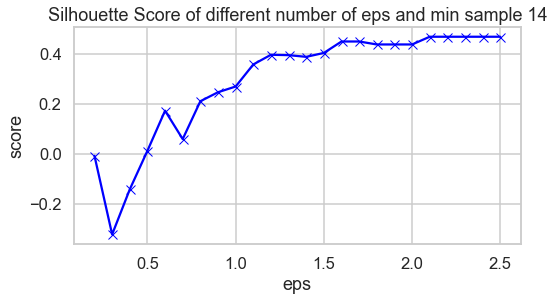

using min_samples 15 the silhouette is : 0.4685207355522043


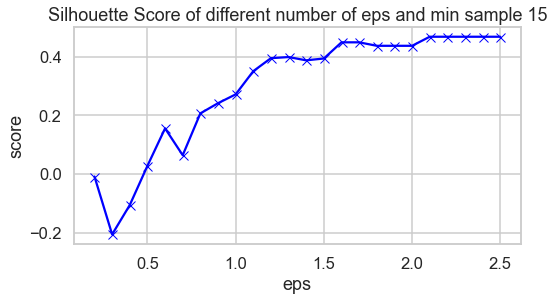

using min_samples 16 the silhouette is : 0.4685207355522043


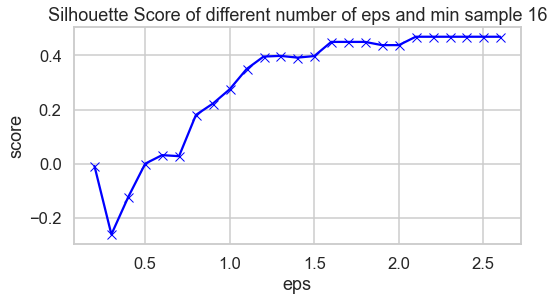

using min_samples 17 the silhouette is : 0.4685207355522043


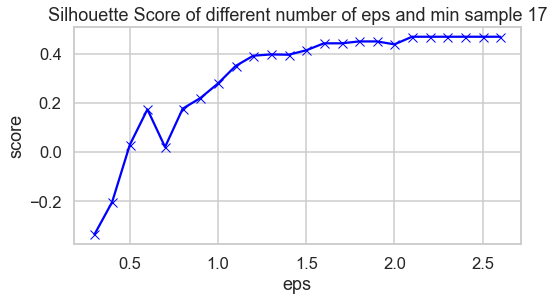

using min_samples 18 the silhouette is : 0.4685207355522043


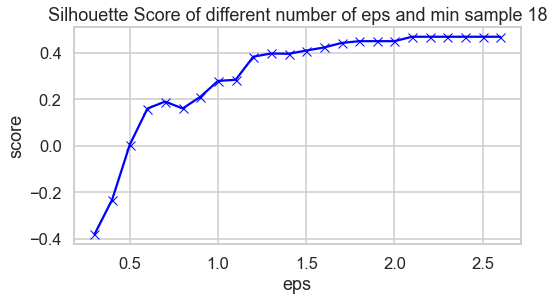

using min_samples 19 the silhouette is : 0.4685207355522043


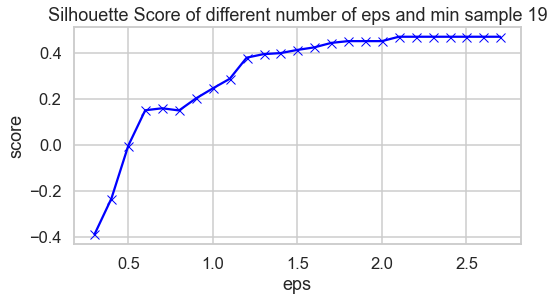

using min_samples 20 the silhouette is : 0.4685207355522043


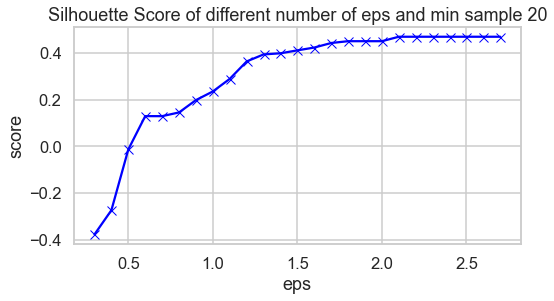

using min_samples 21 the silhouette is : 0.4685207355522043


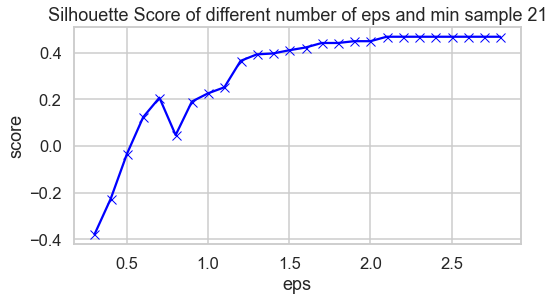

using min_samples 22 the silhouette is : 0.4685207355522043


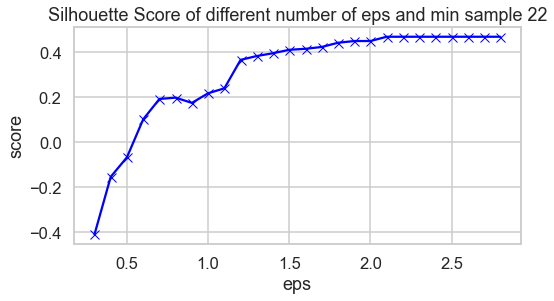

using min_samples 23 the silhouette is : 0.4685207355522043


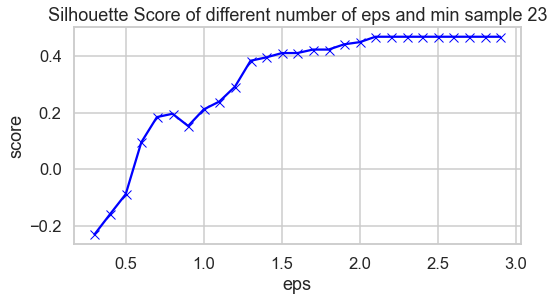

using min_samples 24 the silhouette is : 0.4685207355522043


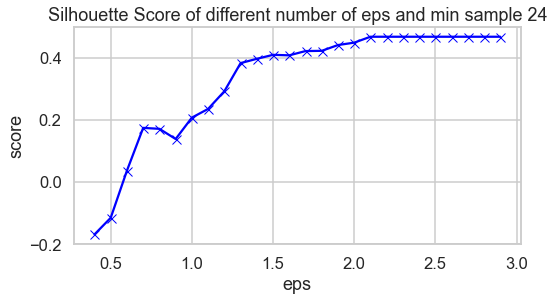

using min_samples 25 the silhouette is : 0.4685207355522043


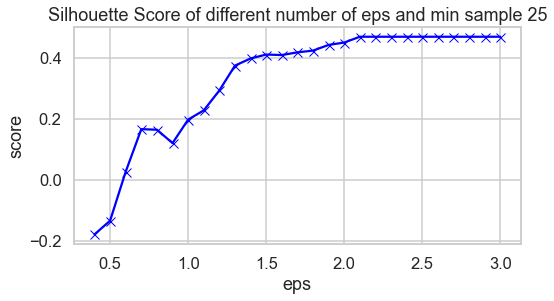

In [25]:
result = dbscan_best_combination(Multi_blob_Data)

In [26]:
print(f' high score {result[0]} , best combination {result[1]}, no_cluster: {result[2]}')

 high score 0.4685207355522043 , best combination {'eps': 2.0999999999999996, 'min_samples': 6}, no_cluster: 1


In [27]:
multi_blob_silhouette['DBSCAN'] = {'score': result[0], 'best combination': result[1], 'no_cluster':result[2]}

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [28]:
def gmm(data, n_components,cov_type, draw = True):
    gmm = GaussianMixture(n_components= n_components, covariance_type=cov_type)
    gmm.fit(data)
    pred = gmm.predict(data)
    color = list(mcolors.CSS4_COLORS)[::-1]
    ax = plt.axes()
    ax.set_facecolor("grey")
    
    if draw:
        for i in range(n_components):
            plt.scatter( data[ pred == i , 0 ], data[ pred == i , 1 ],c = color[i])

In [29]:
def plot_contour(X, n_components,typ):
    # Fit a Gaussian mixture model with the specified number of components
    gmm = GaussianMixture(n_components=n_components,covariance_type=typ)
    gmm.fit(X)

    # Create a grid of points to evaluate the distribution
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = gmm.score_samples(np.vstack([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)

    # Create a contour plot of the Gaussian mixture model
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.contourf(xx, yy, Z, cmap='YlGn')
    ax.scatter(X[:, 0], X[:, 1], c='white', alpha=0.08)
    ax.set_title('Gaussian Mixture Model with {} components'.format(n_components))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()

In [30]:
def silhouette_gmm(data):
    high_score = -2
    n_cluster = 0
    cov_type = ''
    for cov in ['full','diag','spherical','tied']:
        for i in range(2,100,1):
            gmm = GaussianMixture(n_components=i,covariance_type=cov).fit(data)
            score = silhouette_score(data, gmm.predict(data) )
            if score > high_score:
                high_score = score
                n_cluster = i
                cov_type = cov
    return high_score, n_cluster, cov_type

Covariance type full


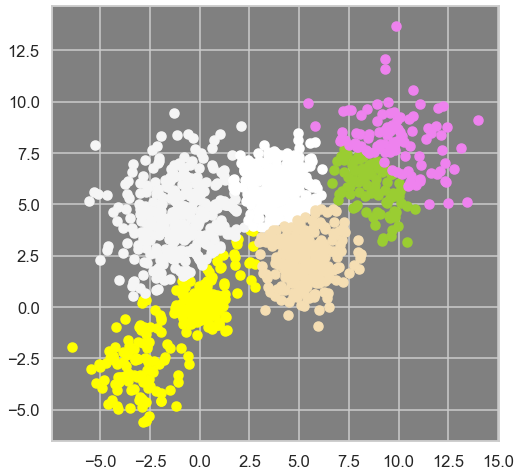

<Figure size 576x576 with 0 Axes>

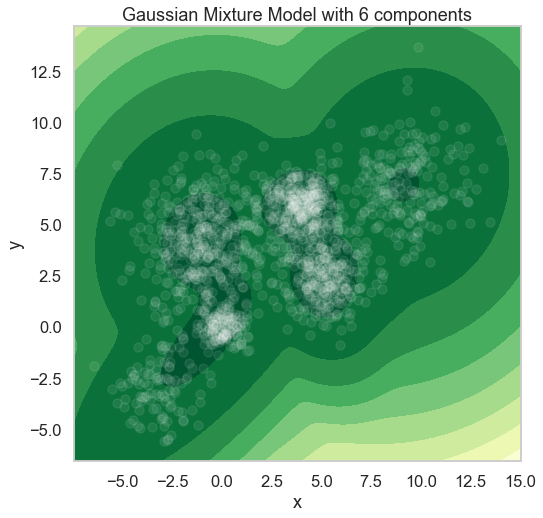

Covariance type tied


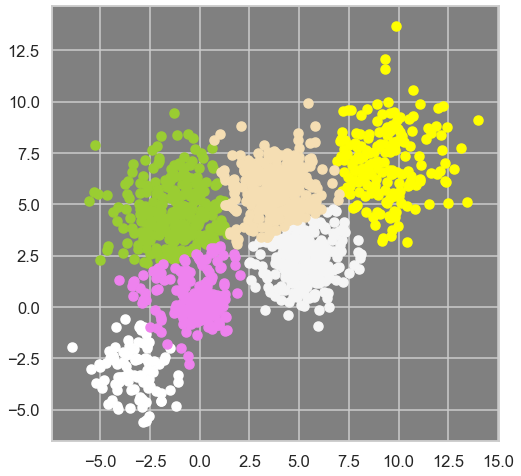

<Figure size 576x576 with 0 Axes>

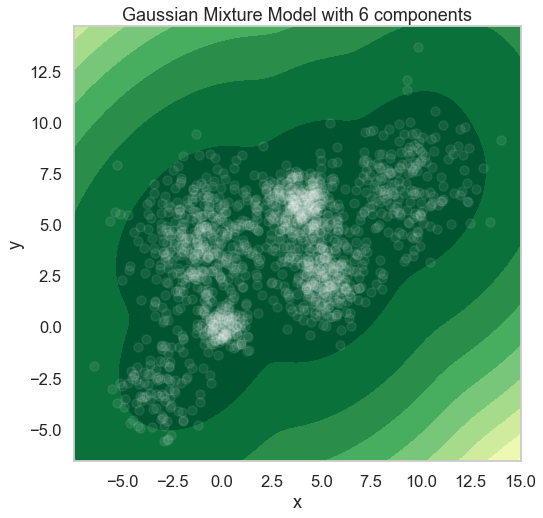

Covariance type diag


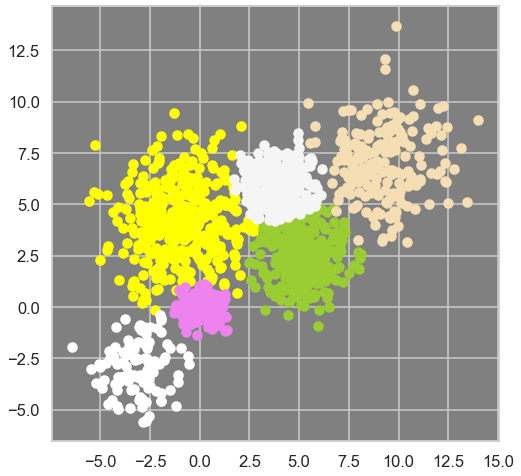

<Figure size 576x576 with 0 Axes>

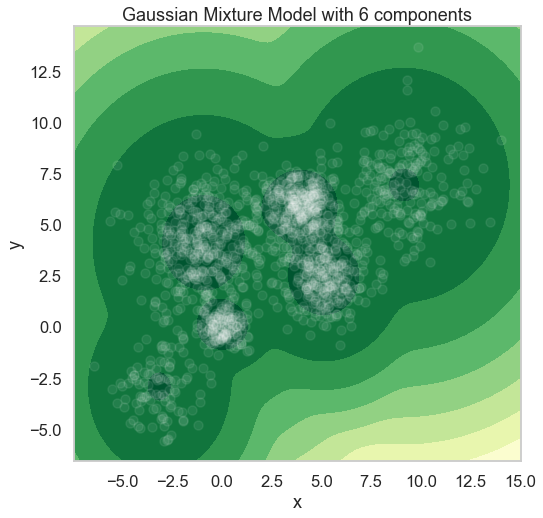

Covariance type spherical


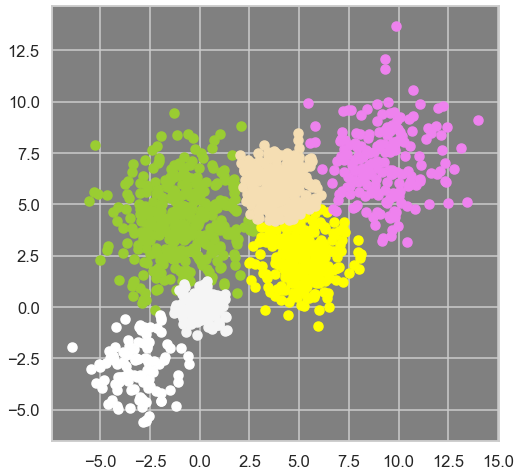

<Figure size 576x576 with 0 Axes>

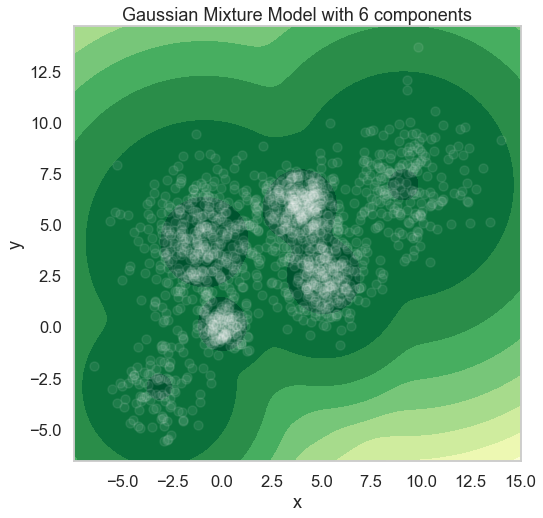

In [31]:
covariance_type = ['full','tied','diag','spherical']
for typ in covariance_type:
    print(f'Covariance type {typ}')
    plt.figure()
    gmm(Multi_blob_Data, 6, typ)
    plt.show()
    plt.figure()
    plot_contour(Multi_blob_Data, 6, typ)
    plt.show();
    print('==================================================')

In [32]:
result = silhouette_gmm(Multi_blob_Data)

In [33]:
print(f'the highest score {result[0]} using covariance type {result[2]} and the optimal number of cluster {result[1]}')

the highest score 0.48567327695888446 using covariance type tied and the optimal number of cluster 6


In [34]:
multi_blob_silhouette['GMM'] = {'score':result[0],'covariance_type':result[2],'no_cluster':result[1]}

### Comparison

In [35]:
print( 'kmeans ',multi_blob_silhouette['kmeans'])

kmeans  {'score': 0.48614459735646176, 'no_clusters': 6}


In [36]:
print( 'Agglomerative ',multi_blob_silhouette['Agglomerative'])

Agglomerative  {'score': 0.4716908069861964, 'best combination': {'linkage': 'average', 'affinity': 'euclidean'}, 'no_clusters': 2}


In [37]:
print( 'DBSCAN ',multi_blob_silhouette['DBSCAN'])

DBSCAN  {'score': 0.4685207355522043, 'best combination': {'eps': 2.0999999999999996, 'min_samples': 6}, 'no_cluster': 1}


In [38]:
print( 'GMM ',multi_blob_silhouette['GMM'])

GMM  {'score': 0.48567327695888446, 'covariance_type': 'tied', 'no_cluster': 6}


##### Kmeans and GMM achieve the highest scores and they got the right number of clusters

# iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [39]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
iris_sillhouette = {}
iris_after_normalize_sillhouette = {}

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

In [40]:
iris_data = iris_data['data']
iris_data_normalized = MinMaxScaler().fit_transform( iris_data )

### Kmeans

the optimal number of cluster is : 2


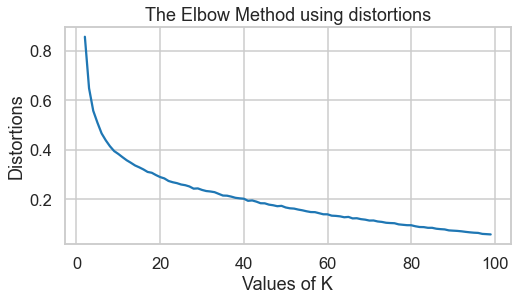

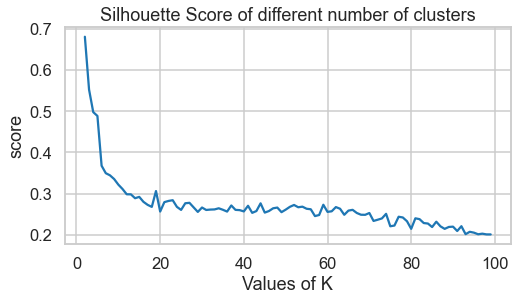

Silhouette score 0.6810461692117462, the number of cluster 2


In [41]:
result = kmeans_without_plotting(iris_data)
print(f'Silhouette score {result[0]}, the number of cluster {result[1]}' )

In [42]:
iris_sillhouette['Kmeans'] = {'score':result[0],'no_cluster':result[1]}

the optimal number of cluster is : 2


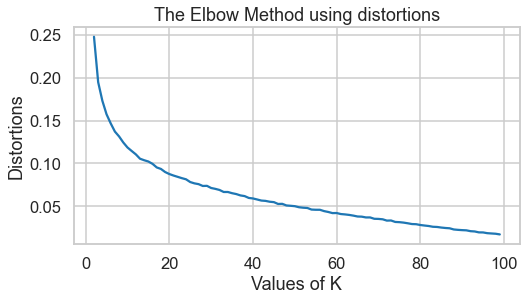

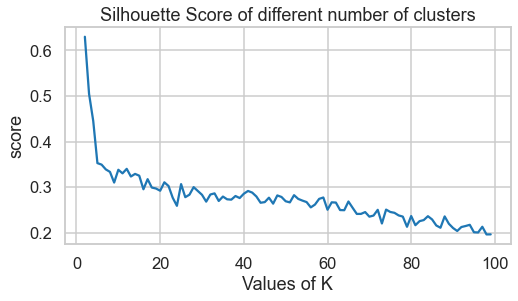

Silhouette score 0.6300471284354711, the number of cluster 2


In [43]:
#Normalized Dataset
result = kmeans_without_plotting(iris_data_normalized)
print(f'Silhouette score {result[0]}, the number of cluster {result[1]}' )

In [44]:
iris_after_normalize_sillhouette['kmeans'] = {'score':result[0],'no_cluster':result[1]}

### Agglomerative Clustering

In [45]:
affinity = ['euclidean','cityblock','cosine']

Dendrogram using single linkage and affinity euclidean


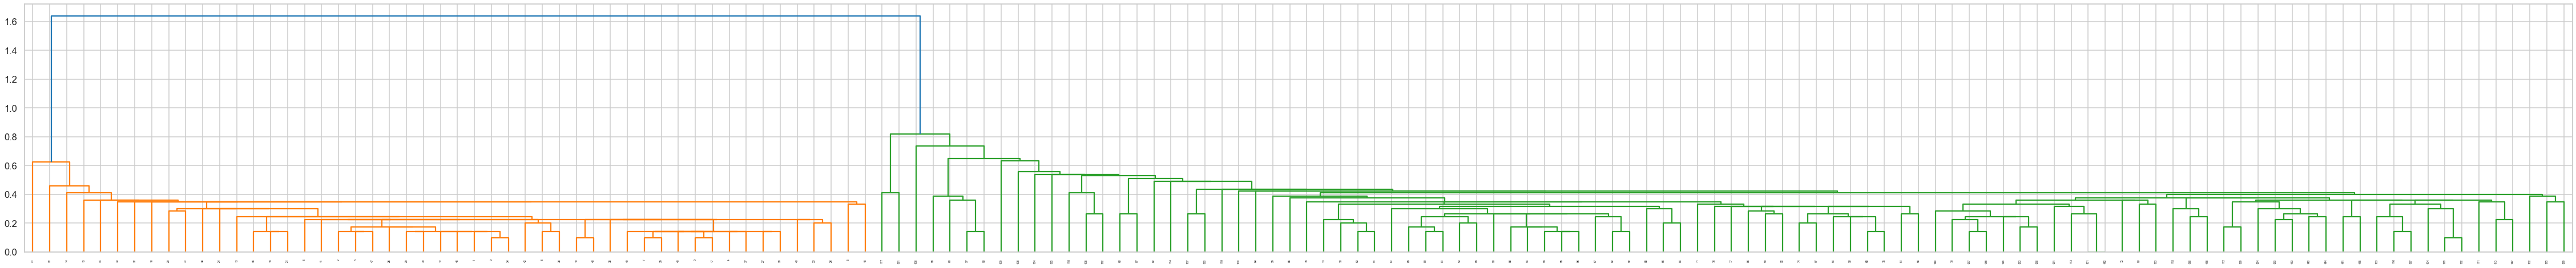

Dendrogram using single linkage and affinity cityblock


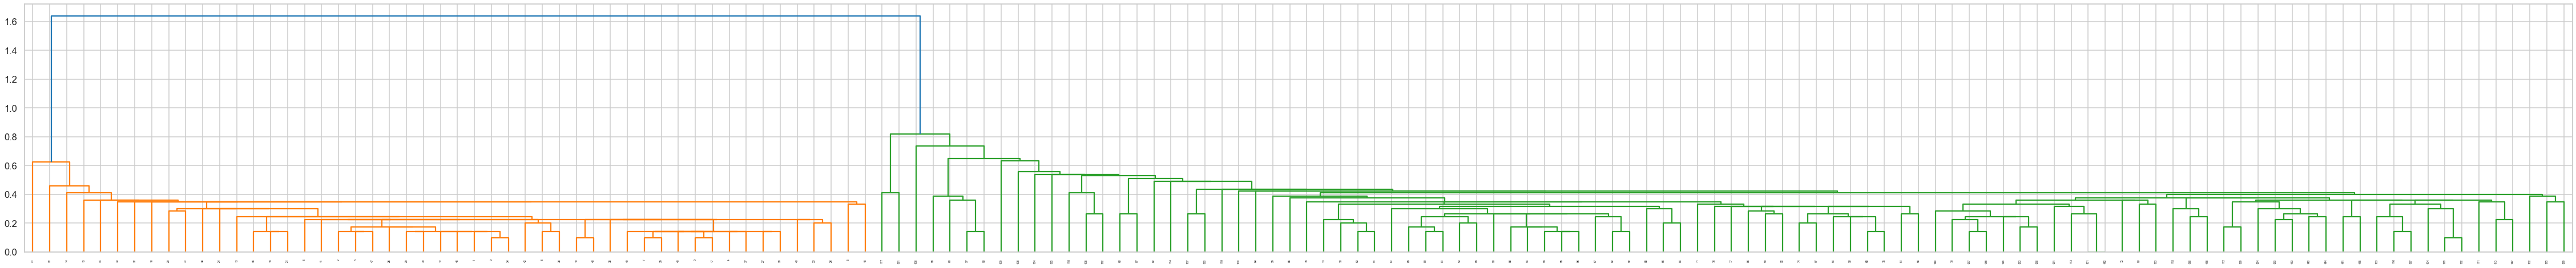

Dendrogram using single linkage and affinity cosine


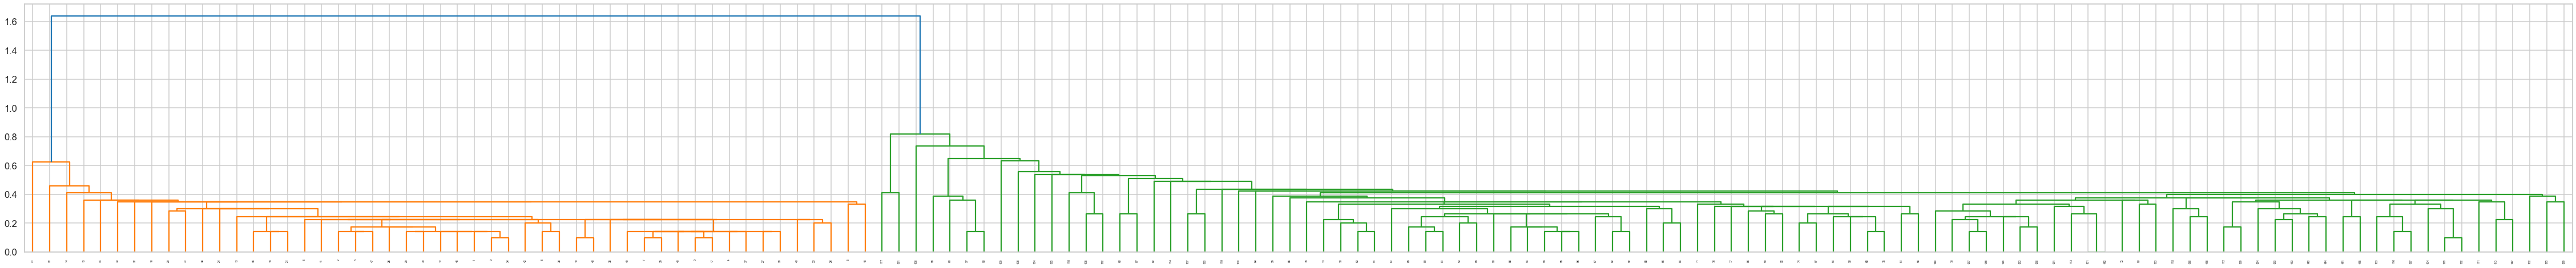

In [48]:
#draw dendrogram using single linkage with different affinity
for aff in  ['euclidean','cityblock','cosine']:
    print(f'Dendrogram using single linkage and affinity {aff}')
    draw_dendrogram(iris_data, 'single', 'euclidean')

Dendrogram using average linkage and affinity euclidean


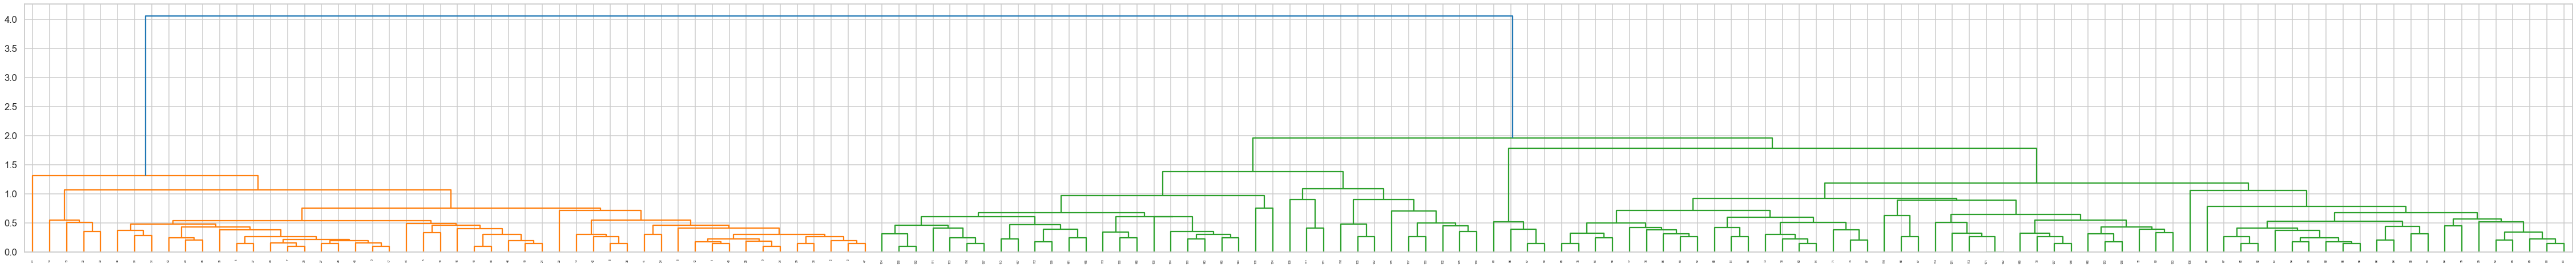

Dendrogram using average linkage and affinity cityblock


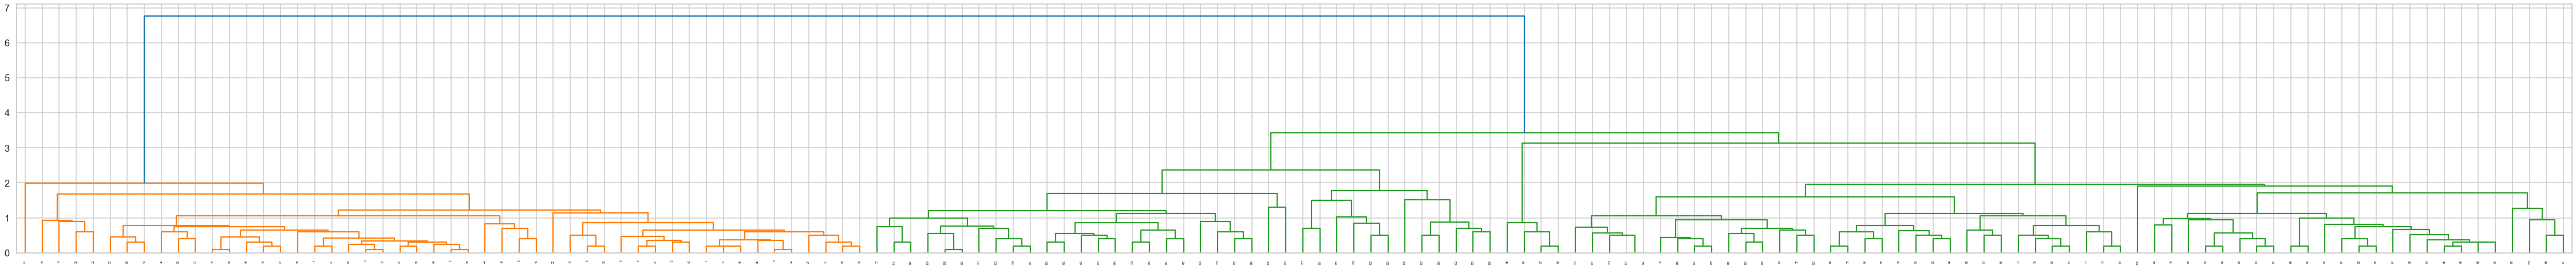

Dendrogram using average linkage and affinity cosine


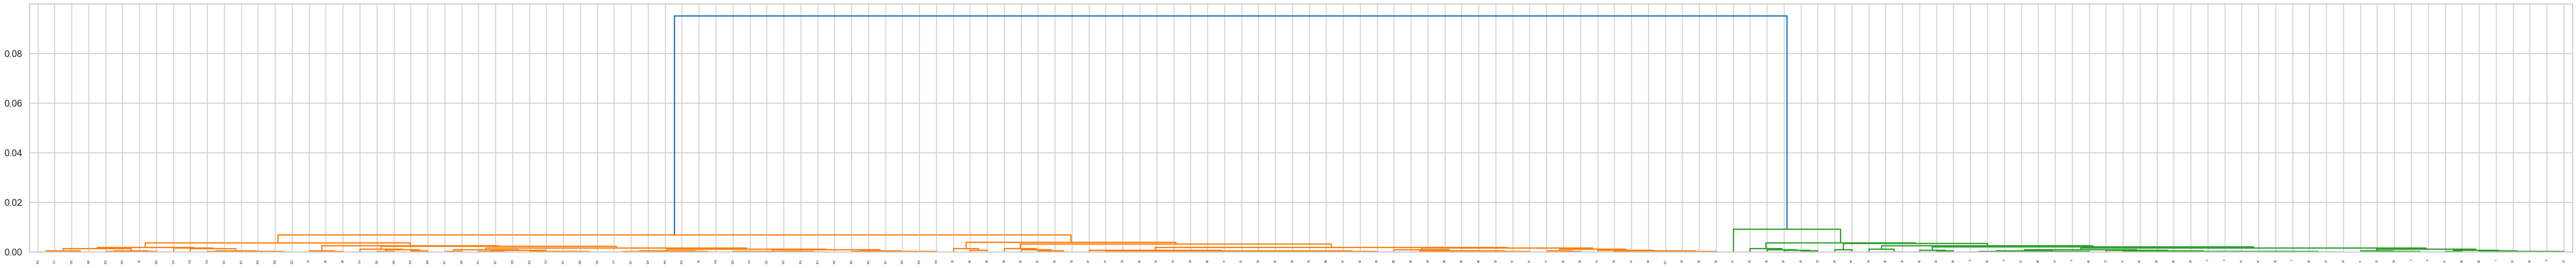

In [50]:
#draw dendrogram using average linkage with different affinity
for aff in affinity:
    print(f'Dendrogram using average linkage and affinity {aff}')
    draw_dendrogram(iris_data, 'average', aff )

In [51]:
#usinge different threshold with single linkage and euclidean 
for distance_threshold in [0.8,1.2] :
    single_link_agglomerative_clustering( iris_data, 'euclidean', distance_threshold, False)

print('================')
#usinge different threshold with average linkage and Manhattan 
for distance_threshold in [1.5,1.8] :
    single_link_agglomerative_clustering( iris_data, 'cityblock', distance_threshold, False)
print('=================')
#usinge different threshold with average linkage and cosine 
for distance_threshold in [0.08,0.1] :
    single_link_agglomerative_clustering( iris_data, 'cosine', distance_threshold, False)
print('=================')

Number of clusters using single linkage and affinity euclidean and distance threshold 0.8 : 3
Number of clusters using single linkage and affinity euclidean and distance threshold 1.2 : 2
Number of clusters using single linkage and affinity cityblock and distance threshold 1.5 : 2
Number of clusters using single linkage and affinity cityblock and distance threshold 1.8 : 2
Number of clusters using single linkage and affinity cosine and distance threshold 0.08 : 1
Number of clusters using single linkage and affinity cosine and distance threshold 0.1 : 1


In [52]:
#usinge different threshold with average linkage and euclidean 
for distance_threshold in [2,3] :
    average_link_agglomerative_clustering( iris_data, 'euclidean', distance_threshold, False)

print('===================')
#usinge different threshold with average linkage and Manhattan 
for distance_threshold in [3,3.6] :
    average_link_agglomerative_clustering( iris_data, 'cityblock', distance_threshold, False)
print('===================')
#usinge different threshold with average linkage and cosine 
for distance_threshold in [0.4,0.8] :
    average_link_agglomerative_clustering( iris_data, 'cosine', distance_threshold, False)
print('===================')

Number of clusters using average linkage and affinity euclidean and distance threshold 2 : 2
Number of clusters using average linkage and affinity euclidean and distance threshold 3 : 2
Number of clusters using average linkage and affinity cityblock and distance threshold 3 : 4
Number of clusters using average linkage and affinity cityblock and distance threshold 3.6 : 2
Number of clusters using average linkage and affinity cosine and distance threshold 0.4 : 1
Number of clusters using average linkage and affinity cosine and distance threshold 0.8 : 1


In [53]:
combination = []
for linkage in ['single','average']:
    for aff in ['euclidean','cityblock','cosine']:
        result = silhouette_agglomerative(iris_data, linkage, aff)
        if len(combination) == 0:
            combination.append( result[0] )
            combination.append({ 'linkage' : linkage, 'affinity' : aff})
            combination.append(result[1])
        elif  result[0] > combination[0]:
            combination[0] = result[0]
            combination[1] = { 'linkage' : linkage, 'affinity' : aff}
            combination[2] = result[1]
print( f'Silhouette score {combination[0]}, {combination[1]}, and tbhe number of cluster for the best value {combination[2]}')

Silhouette score 0.6867350732769777, {'linkage': 'single', 'affinity': 'euclidean'}, and tbhe number of cluster for the best value 2


In [54]:
iris_sillhouette['Agglomerative'] = {'score':combination[0],'best combination':combination[1],'no_cluster':combination[2]}

In [55]:
#Normalized
combination = []
for linkage in ['single','average']:
    for aff in ['euclidean','cityblock','cosine']:
        result = silhouette_agglomerative(iris_data_normalized, linkage, aff)
        if len(combination) == 0:
            combination.append( result[0] )
            combination.append({ 'linkage' : linkage, 'affinity' : aff})
            combination.append(result[1])
        elif  result[0] > combination[0]:
            combination[0] = result[0]
            combination[1] = { 'linkage' : linkage, 'affinity' : aff}
            combination[2] = result[1]
print( f'Silhouette score {combination[0]}, {combination[1]}, and the number of cluster for the best value {combination[2]}')

Silhouette score 0.6300471284354711, {'linkage': 'single', 'affinity': 'euclidean'}, and the number of cluster for the best value 2


In [56]:
iris_after_normalize_sillhouette['Agglomerative'] = {'score':combination[0],'best combination':combination[1],'no_cluster':combination[2]}

### DBSCAN

In [57]:
result = dbscan_best_combination(iris_data, False)
print( f'Silhouette score {result[0]}, {result[1]}, and the number of cluster for the best value {result[2]}' )

Silhouette score 0.6867350732769777, {'eps': 0.8999999999999999, 'min_samples': 5}, and the number of cluster for the best value 2


In [58]:
iris_sillhouette['DBSCAN'] = {'score':result[0],'best combination':result[1],'no_cluster':result[2]}

In [59]:
#normalized
result = dbscan_best_combination(iris_data_normalized, False)
print( f'Silhouette score {result[0]}, {result[1]}, and the number of cluster for the best value {result[2]}' )

Silhouette score 0.6300471284354711, {'eps': 0.4, 'min_samples': 5}, and the number of cluster for the best value 2


In [60]:
iris_after_normalize_sillhouette['DBSCAN'] = {'score':result[0],'best combination':result[1],'no_cluster':result[2]}

### GMM

In [62]:
result = silhouette_gmm(iris_data)
print(f'Silhouette score {result[0]} and the number of cluster for the best value {result[1]}')

Silhouette score 0.6867350732769777 and the number of cluster for the best value 2


In [63]:
iris_sillhouette['GMM'] = {'score':result[0],'covariance_type':result[2],'no_cluster':result[1]}

In [64]:
#normalized dataset
result = silhouette_gmm(iris_data_normalized)
print(f'Silhouette score {result[0]} and the number of cluster for the best value {result[1]}')

Silhouette score 0.6300471284354711 and the number of cluster for the best value 2


In [65]:
iris_after_normalize_sillhouette['GMM'] = {'score':result[0],'covariance_type':result[2],'no_cluster':result[1]}

#####  Comparison Befor Normalization

In [66]:
print(iris_sillhouette)

{'Kmeans': {'score': 0.6810461692117462, 'no_cluster': 2}, 'Agglomerative': {'score': 0.6867350732769777, 'best combination': {'linkage': 'single', 'affinity': 'euclidean'}, 'no_cluster': 2}, 'DBSCAN': {'score': 0.6867350732769777, 'best combination': {'eps': 0.8999999999999999, 'min_samples': 5}, 'no_cluster': 2}, 'GMM': {'score': 0.6867350732769777, 'covariance_type': 'full', 'no_cluster': 2}}


##### Comparison After Normalization

In [67]:
print(iris_after_normalize_sillhouette)

{'kmeans': {'score': 0.6300471284354711, 'no_cluster': 2}, 'Agglomerative': {'score': 0.6300471284354711, 'best combination': {'linkage': 'single', 'affinity': 'euclidean'}, 'no_cluster': 2}, 'DBSCAN': {'score': 0.6300471284354711, 'best combination': {'eps': 0.4, 'min_samples': 5}, 'no_cluster': 2}, 'GMM': {'score': 0.6300471284354711, 'covariance_type': 'full', 'no_cluster': 2}}


# Customer dataset
Repeat all the above on the customer data set 

In [68]:
customer_data = pd.read_csv('Customer data.csv',index_col=0)
customer_data.head()

Sex  Marital status  Age  Education  Income  Occupation  \
ID                                                                   
100000001    0               0   67          2  124670           1   
100000002    1               1   22          1  150773           1   
100000003    0               0   49          1   89210           0   
100000004    0               0   45          1  171565           1   
100000005    0               0   53          1  149031           1   

           Settlement size  
ID                          
100000001                2  
100000002                2  
100000003                0  
100000004                1  
100000005                1

In [69]:
for col in customer_data.columns:
    print(f'Feature {col}: ', customer_data[col].unique())

Feature Sex:  [0 1]
Feature Marital status:  [0 1]
Feature Age:  [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59 73 72 76 71 18]
Feature Education:  [2 1 0 3]
Feature Income:  [124670 150773  89210 ...  86400  97968  68416]
Feature Occupation:  [1 0 2]
Feature Settlement size:  [2 0 1]


In [70]:
customer_dataset = MinMaxScaler().fit_transform(customer_data)

In [71]:
customer_sillouette = {}

### Kmeans

the optimal number of cluster is : 45


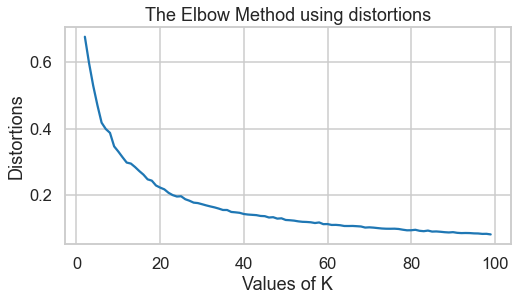

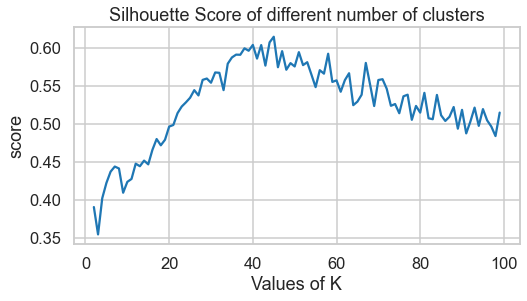

Silhouette score 0.6144473994176396, the number of cluster 45


In [72]:
result = kmeans_without_plotting(customer_dataset)
print(f'Silhouette score {result[0]}, the number of cluster {result[1]}' )

In [73]:
customer_sillouette['Kmeans'] = {'score' :result[0],'no_cluster' : result[1]}

### Agglomerative Clustering

In [74]:
combination = []
for linkage in ['single','average']:
    for aff in ['euclidean','cityblock','cosine']:
        result = silhouette_agglomerative(customer_dataset, linkage, aff)
        if len(combination) == 0:
            combination.append( result[0] )
            combination.append({ 'linkage' : linkage, 'affinity' : aff})
            combination.append(result[1])
        elif  result[0] > combination[0]:
            combination[0] = result[0]
            combination[1] = { 'linkage' : linkage, 'affinity' : aff}
            combination[2] = result[1]
print( f'Silhouette score {combination[0]}, {combination[1]}, and the number of cluster for the best value {combination[2]}')

Silhouette score 0.6522300904573621, {'linkage': 'average', 'affinity': 'cityblock'}, and the number of cluster for the best value 85


In [75]:
customer_sillouette['Agglomerative'] = {'score' :combination[0],'best combination':combination[1],'no_cluster' : combination[2]}

### DBSCAN

In [76]:
result = dbscan_best_combination(customer_dataset, False)
print( f'Silhouette score {result[0]}, {result[1]}, and the number of cluster for the best value {result[2]}')

Silhouette score 0.6183605686166684, {'eps': 0.3, 'min_samples': 5}, and the number of cluster for the best value 53


In [77]:
customer_sillouette['DBSCAN'] = {'score' :result[0],'best combination':result[1],'no_cluster' : result[2]}

### GMM

In [78]:
result = silhouette_gmm(customer_dataset)
print(f'Silhouette score {result[0]} and the number of cluster for the best value {result[1]}')

Silhouette score 0.6251764243082457 and the number of cluster for the best value 53


In [79]:
customer_sillouette['GMM'] = {'score' :result[0],'covariance type':result[2],'no_cluster' : result[1]}

#### Comparison

In [80]:
print(customer_sillouette)

{'Kmeans': {'score': 0.6144473994176396, 'no_cluster': 45}, 'Agglomerative': {'score': 0.6522300904573621, 'best combination': {'linkage': 'average', 'affinity': 'cityblock'}, 'no_cluster': 85}, 'DBSCAN': {'score': 0.6183605686166684, 'best combination': {'eps': 0.3, 'min_samples': 5}, 'no_cluster': 53}, 'GMM': {'score': 0.6251764243082457, 'covariance type': 'tied', 'no_cluster': 53}}
